# Старые задачи по курсу Python

## Предварительные настройки

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Для вывода LaTeX-формул
import re
from sympy.parsing.latex import parse_latex
from sympy import symbols, summation, integrate, Symbol
from sympy import pretty


def render_message(message, sep="\n"):
    """Попытка выводить математические формулы в терминале"""
    # Находим все фрагменты между символами '$'
    pattern = r"\$(.*?)\$"

    def repl(match):
        latex_expr = match.group(1)
        try:
            # Парсим LaTeX-выражение
            expr = parse_latex(latex_expr)
            # Преобразуем выражение в строку с красивым форматированием
            rendered = pretty(expr)
            return f"{sep}{rendered}{sep}"
        except Exception as e:
            # В случае ошибки возвращаем исходную формулу
            return f"{sep}{match.group(0)}{sep}"

    return re.sub(pattern, repl, message)

## 203-13a

### 1. Приближение данных полиномами

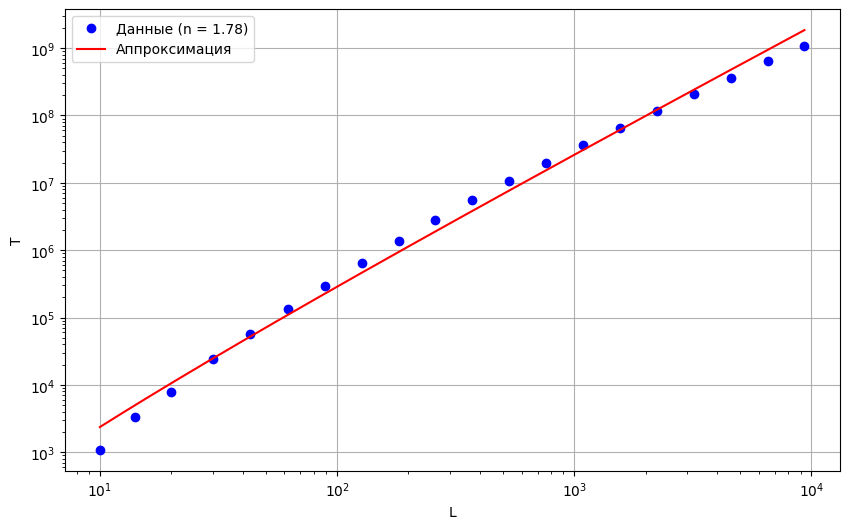

In [81]:
df = pd.read_csv("data/1.txt", sep=" ")
df = df[(df["L"] > 1) & (df["T"] > 0)]

log_L, log_T = np.log(df["L"]), np.log(df["T"])
n = np.polyfit(log_L, log_T - np.log(log_L), 1)[0]

L_fit = np.geomspace(df["L"].min(), df["L"].max(), 500)
T_fit = np.exp(
    np.polyval(np.polyfit(log_L, log_T - np.log(log_L), 1), np.log(L_fit))
) * np.log(L_fit)

plt.figure(figsize=(10, 6))
plt.loglog(df["L"], df["T"], "bo", label=f"Данные (n = {n:.2f})")
plt.loglog(L_fit, T_fit, "r", label="Аппроксимация")
plt.xlabel("L"), plt.ylabel("T"), plt.legend(), plt.grid(True)
plt.show()

### 2. Расчёт сумм рядов

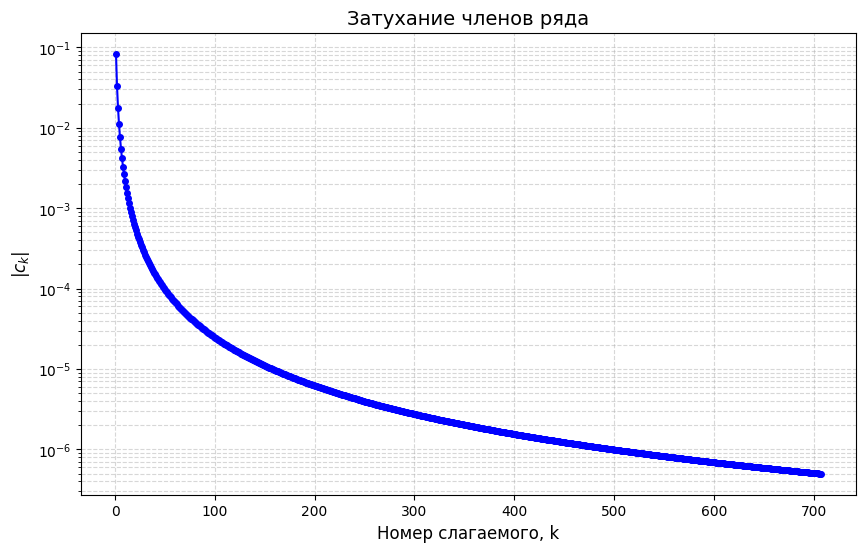

Число слагаемых для заданной точности:
ε = 5.0e-05: 70 слагаемых
ε = 5.0e-06: 223 слагаемых
ε = 5.0e-07: 707 слагаемых


In [82]:
def calculate_terms_and_sum(epsilon):
    sum_total = 0.0
    k = 1
    terms = []
    while True:
        ck = 1 / ((2 * k + 1) * (2 * k + 2))
        terms.append(ck)
        sum_total += ck
        if ck < epsilon:
            break
        k += 1
    return sum_total, k, terms


epsilons = [0.5e-4, 0.5e-5, 0.5e-6]
results = []

for eps in epsilons:
    sum_est, k_needed, terms = calculate_terms_and_sum(eps)
    results.append((eps, sum_est, k_needed, terms))

plt.figure(figsize=(10, 6))
k_values = np.arange(1, len(results[-1][3]) + 1)
c_values = results[-1][3]
plt.semilogy(k_values, c_values, "bo-", markersize=4)  # Полулогарифмический график
plt.xlabel("Номер слагаемого, k", fontsize=12)
plt.ylabel("$|c_k|$", fontsize=12)
plt.title("Затухание членов ряда", fontsize=14)
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.show()

# Вывод результатов
print("Число слагаемых для заданной точности:")
for eps, sum_est, k_needed, _ in results:
    print(f"ε = {eps:.1e}: {k_needed} слагаемых")

## 204-11b

### 1. Объекты

In [83]:
class Lamp:
    def __init__(self, manufacturer, lamp_type, power, lumen):
        self.manufacturer = manufacturer
        self.type = lamp_type
        self.power = power
        self.lumen = lumen

    def __gt__(self, other):
        return self.lumen > other.lumen

    def __str__(self):
        return f"Лампа {self.manufacturer}: {self.type}, потребляемая мощность {self.power} Вт, световой поток {self.lumen} люмен."


if __name__ == "__main__":
    a = Lamp("IKEA", "светодиодная", 10, 650)
    b = Lamp("OSRAM", "накаливания", 60, 700)
    print(a, b, sep="\n")
    print("первая ярче" if a > b else "вторая не хуже")

Лампа IKEA: светодиодная, потребляемая мощность 10 Вт, световой поток 650 люмен.
Лампа OSRAM: накаливания, потребляемая мощность 60 Вт, световой поток 700 люмен.
вторая не хуже


### 2. Наследования

In [84]:
class SpaceBody:
    def __init__(self, name, info):
        self.name = name
        self.info = info

    def __str__(self):
        return f"Небесное тело под названием {self.name}. Основные факты: {self.info}"


class Star(SpaceBody):
    def __init__(self, name, mass, spectral_class):
        super().__init__(name, "звезда")
        self.mass = mass
        self.spectral_class = spectral_class

    def __str__(self):
        return f"{super().__str__()} Масса: {self.mass} кг, спектральный класс: {self.spectral_class}."


class Planet(SpaceBody):
    def __init__(self, name, mass, star, orbital_period):
        super().__init__(name, "планета")
        self.mass = mass
        self.star = star
        self.orbital_period = orbital_period

    def __str__(self):
        return f"{super().__str__()} Масса: {self.mass} кг, звезда: {self.star.name}, период обращения: {self.orbital_period} дней."


class Spacecraft(SpaceBody):
    def __init__(self, name, info, launch_year):
        super().__init__(name, info)
        self.launch_year = launch_year

    def __str__(self):
        return f"{super().__str__()} Год запуска: {self.launch_year}."


if __name__ == "__main__":
    sun = Star("Солнце", 2e20, "G2V")
    earth = Planet("Земля", 6e10, sun, 4000)
    voyager1 = Spacecraft("Вояджер-1", "исследование дальних планет", 1977)
    oumuamua = SpaceBody("1I/Оумуамуа", "первый обнаруженный межзвёздный объект")
    print(sun, earth, voyager1, oumuamua, sep="\n\n")

Небесное тело под названием Солнце. Основные факты: звезда Масса: 2e+20 кг, спектральный класс: G2V.

Небесное тело под названием Земля. Основные факты: планета Масса: 60000000000.0 кг, звезда: Солнце, период обращения: 4000 дней.

Небесное тело под названием Вояджер-1. Основные факты: исследование дальних планет Год запуска: 1977.

Небесное тело под названием 1I/Оумуамуа. Основные факты: первый обнаруженный межзвёздный объект


## 204-13a

(повторяет п.1, но всё-таки сделал №1 в качестве демонстрации)

### 1. Расчёт сумм рядов

In [85]:
def calculate_zeta(s, epsilon):
    sum_total = 0.0
    k = 1
    while True:
        term = 1 / (k**s)
        sum_total += term
        if term < epsilon:
            break
        k += 1
    return sum_total, k


# Требуемые точности (ε для 4, 5, 6 значащих цифр)
epsilons = [5e-5, 5e-6, 5e-7]

print(render_message(r"Результаты для $\zeta(2) = \pi^2 / 6$"))
for eps in epsilons:
    sum_est, n_terms = calculate_zeta(2, eps)
    print(
        render_message(
            r"Точность $\epsilon$ = "
            + f"{eps:.1e}: {n_terms} слагаемых, сумма = {sum_est:.10f}",
            sep="",
        )
    )

print("\n" + "-" * 64 + "\n")

print(render_message(r"Результаты для $\zeta(4) = \pi^4/90$"))
for eps in epsilons:
    sum_est, n_terms = calculate_zeta(4, eps)
    print(
        render_message(
            r"Точность $\epsilon$ = "
            + f"{eps:.1e}: {n_terms} слагаемых, сумма = {sum_est:.10f}",
            sep="",
        )
    )

Результаты для 
$\zeta(2) = \pi^2 / 6$

Точность $\epsilon$ = 5.0e-05: 142 слагаемых, сумма = 1.6379165518
Точность $\epsilon$ = 5.0e-06: 448 слагаемых, сумма = 1.6427044134
Точность $\epsilon$ = 5.0e-07: 1415 слагаемых, сумма = 1.6442276027

----------------------------------------------------------------

Результаты для 
$\zeta(4) = \pi^4/90$

Точность $\epsilon$ = 5.0e-05: 12 слагаемых, сумма = 1.0821531101
Точность $\epsilon$ = 5.0e-06: 22 слагаемых, сумма = 1.0822939987
Точность $\epsilon$ = 5.0e-07: 38 слагаемых, сумма = 1.0823173946


## 204-15b

### 1. Конфигурационные файлы

In [86]:
import json
import numpy as np
from sympy import pi, zeta


def load_config(config_path):
    """Загружает параметры из json-конфига."""
    try:
        with open(config_path, "r") as f:
            config = json.load(f)
        return config
    except FileNotFoundError:
        print(f"Ошибка: файл {config_path} не найден!")
        return None


def calculate_zeta(config):
    """Вычисляет сумму ряда для с параметрами из конфига."""
    if config is None:
        return

    s = config.get("s", 2)
    epsilon = config.get("epsilon", 1e-5)
    max_terms = config.get("max_terms", 100000)
    decimal_places = config.get("decimal_places", 6)

    exact = float(zeta(s).evalf())
    sum_total = 0.0
    k = 1

    while k <= max_terms:
        term = 1 / (k**s)
        sum_total += term
        if term < epsilon:
            break
        k += 1

    print(f"s = {s}")
    print(f"Точное значение: {exact:.{decimal_places}f}")
    print(f"Частичная сумма: {sum_total:.{decimal_places}f} ({k} слагаемых)")
    print(f"Погрешность: {abs(exact - sum_total):.{decimal_places}f}\n")


# Демонстрация работы с разными конфигами
print("=== Конфиг 1: Быстрые вычисления (config_fast.json) ===")
config_fast = load_config("data/config_fast.json")
calculate_zeta(config_fast)

print("=== Конфиг 2: Высокая точность (config_accurate.json) ===")
config_accurate = load_config("data/config_accurate.json")
calculate_zeta(config_accurate)

=== Конфиг 1: Быстрые вычисления (config_fast.json) ===
s = 2
Точное значение: 1.6449
Частичная сумма: 1.6351 (101 слагаемых)
Погрешность: 0.0099

=== Конфиг 2: Высокая точность (config_accurate.json) ===
s = 4
Точное значение: 1.08232323
Частичная сумма: 1.08232148 (57 слагаемых)
Погрешность: 0.00000175



## 3a

### 1. Углы между векторами и объём параллелепипеда

In [87]:
def angle_between_vectors(v1, v2, use_numpy=True):
    """Вычисляет угол между двумя векторами (в радианах)."""
    if use_numpy:
        cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    else:
        dot_product = sum(x * y for x, y in zip(v1, v2))
        norm_v1 = sum(x**2 for x in v1) ** 0.5
        norm_v2 = sum(x**2 for x in v2) ** 0.5
        cos_theta = dot_product / (norm_v1 * norm_v2)
    return np.arccos(np.clip(cos_theta, -1.0, 1.0))


def calculate_volume(b1, b2, b3, use_numpy=True):
    """Вычисляет объём параллелепипеда двумя способами."""
    if use_numpy:
        # Способ 1: Смешанное произведение
        matrix = np.array([b1, b2, b3])
        vol1 = abs(np.linalg.det(matrix))
        # Способ 2: Определитель Грама
        G = np.array(
            [
                [np.dot(b1, b1), np.dot(b1, b2), np.dot(b1, b3)],
                [np.dot(b2, b1), np.dot(b2, b2), np.dot(b2, b3)],
                [np.dot(b3, b1), np.dot(b3, b2), np.dot(b3, b3)],
            ]
        )
        vol2 = np.sqrt(np.linalg.det(G))
    else:
        # Ручная реализация смешанного произведения
        det = (
            b1[0] * (b2[1] * b3[2] - b2[2] * b3[1])
            - b1[1] * (b2[0] * b3[2] - b2[2] * b3[0])
            + b1[2] * (b2[0] * b3[1] - b2[1] * b3[0])
        )
        vol1 = abs(det)

        # Ручная реализация определителя Грама
        def dot(u, v):
            return sum(x * y for x, y in zip(u, v))

        G = [
            [dot(b1, b1), dot(b1, b2), dot(b1, b3)],
            [dot(b2, b1), dot(b2, b2), dot(b2, b3)],
            [dot(b3, b1), dot(b3, b2), dot(b3, b3)],
        ]
        det_G = (
            G[0][0] * (G[1][1] * G[2][2] - G[1][2] * G[2][1])
            - G[0][1] * (G[1][0] * G[2][2] - G[1][2] * G[2][0])
            + G[0][2] * (G[1][0] * G[2][1] - G[1][1] * G[2][0])
        )
        vol2 = abs(det_G) ** 0.5
    return vol1, vol2


# Пример
b1 = np.array([1, 0, 0])
b2 = np.array([1, -1, 1])
b3 = np.array([1, -1, -1])

# Углы между векторами
print("Углы между векторами (радианы):")
print(f"b1 и b2: {angle_between_vectors(b1, b2):.3f}")
print(f"b1 и b3: {angle_between_vectors(b1, b3):.3f}")
print(f"b2 и b3: {angle_between_vectors(b2, b3):.3f}\n")

# Объём параллелепипеда
vol_numpy, vol_custom = calculate_volume(b1, b2, b3, use_numpy=False)
print(f"Объём (numpy): {vol_numpy:.4f}")
print(f"Объём (ручной): {vol_custom:.4f}")
print(f"Разница: {abs(vol_numpy - vol_custom):.4e}")

Углы между векторами (радианы):
b1 и b2: 0.955
b1 и b3: 0.955
b2 и b3: 1.231

Объём (numpy): 2.0000
Объём (ручной): 2.0000
Разница: 0.0000e+00


### 3. Метод Гаусса

In [88]:
def gaussian_elimination(A, b):
    """Решает СЛАУ методом Гаусса (без выбора ведущего элемента)."""
    n = len(A)
    M = np.hstack((A.astype(float), b.reshape(-1, 1)))

    for i in range(n):
        max_row = np.argmax(np.abs(M[i:, i])) + i
        M[[i, max_row]] = M[[max_row, i]]

        pivot = M[i, i]
        if abs(pivot) < 1e-10:
            raise ValueError("Матрица вырождена")
        M[i] /= pivot

        for j in range(i + 1, n):
            factor = M[j, i]
            M[j] -= factor * M[i]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = M[i, -1] - np.dot(M[i, i + 1 : n], x[i + 1 : n])
    return x


np.random.seed(42)
A = np.random.rand(10, 10) * 10 - 5
A = A + np.diag(np.abs(A).sum(axis=1))  # Делаем матрицу диагонально доминирующей
b = np.random.rand(10) * 10 - 5

# Проверка определителя
det = np.linalg.det(A)
assert abs(det) > 1, f"Определитель слишком мал: {det:.2f}"

# Решение методом Гаусса
x_custom = gaussian_elimination(A.copy(), b.copy())

# Решение через numpy
x_numpy = np.linalg.solve(A, b)

# Сравнение результатов
diff = np.linalg.norm(x_custom - x_numpy)
print(f"Норма разности решений: {diff:.2e}")

Норма разности решений: 3.77e-17


## 1.5a

### 1a

Циклы

In [89]:
def multiply_matrix_scalar(matrix, scalar):
    return [[element * scalar for element in row] for row in matrix]


def divide_matrix_scalar(matrix, scalar):
    return [[element / scalar for element in row] for row in matrix]


A = [[6, 4, -1], [0, 2, -7], [-4, 5, 1]]
a = 1.25

A_mult = multiply_matrix_scalar(A, a)
A_div = divide_matrix_scalar(A, a)

A_mult

[[7.5, 5.0, -1.25], [0.0, 2.5, -8.75], [-5.0, 6.25, 1.25]]

NumPy

In [90]:
import numpy as np

A_np = np.array(A)
A_mult_np = A_np * a
A_div_np = A_np / a

A_mult_np

array([[ 7.5 ,  5.  , -1.25],
       [ 0.  ,  2.5 , -8.75],
       [-5.  ,  6.25,  1.25]])

### 1б

Циклы

In [91]:
def elementwise_operation(a, b, op):
    return [[op(a[i][j], b[i][j]) for j in range(len(a[0]))] for i in range(len(a))]


B = [[6, 4, 7], [5, -7, 1], [8, 1, -3]]

mult_result = elementwise_operation(A, B, lambda x, y: x * y)
div_result = elementwise_operation(A, B, lambda x, y: x / y)

mult_result

[[36, 16, -7], [0, -14, -7], [-32, 5, -3]]

NumPy

In [92]:
B_np = np.array(B)
mult_result_np = A_np * B_np
div_result_np = A_np / B_np

mult_result_np

array([[ 36,  16,  -7],
       [  0, -14,  -7],
       [-32,   5,  -3]])

### 1в

Циклы

In [93]:
def matrix_multiply(a, b):
    return [
        [sum(a[i][k] * b[k][j] for k in range(len(b))) for j in range(len(b[0]))]
        for i in range(len(a))
    ]


AB = matrix_multiply(A, B)
BA = matrix_multiply(B, A)
commutator = [[AB[i][j] - BA[i][j] for j in range(len(AB[0]))] for i in range(len(AB))]

commutator

[[40, -72, 76], [-72, -32, -22], [-51, -69, -8]]

NumPy

In [94]:
AB_np = np.dot(A_np, B_np)
BA_np = np.dot(B_np, A_np)
commutator_np = AB_np - BA_np

commutator_np

array([[ 40, -72,  76],
       [-72, -32, -22],
       [-51, -69,  -8]])

### 2

In [95]:
def rotate_x(alpha):
    return np.array(
        [
            [1, 0, 0],
            [0, np.cos(alpha), -np.sin(alpha)],
            [0, np.sin(alpha), np.cos(alpha)],
        ]
    )


def rotate_y(beta):
    return np.array(
        [[np.cos(beta), 0, np.sin(beta)], [0, 1, 0], [-np.sin(beta), 0, np.cos(beta)]]
    )


def rotate_z(gamma):
    return np.array(
        [
            [np.cos(gamma), -np.sin(gamma), 0],
            [np.sin(gamma), np.cos(gamma), 0],
            [0, 0, 1],
        ]
    )


alpha = 15 * np.pi / 180
beta = 30 * np.pi / 180
gamma = 45 * np.pi / 180

point = np.array([1, 2, 3])  # Исходная точка

# Поворот на угол alpha вокруг оси X
rotated_x = np.dot(rotate_x(alpha), point)

# Поворот на угол beta вокруг оси Y
rotated_y = np.dot(rotate_y(beta), point)

# Поворот на угол gamma вокруг оси Z
rotated_z = np.dot(rotate_z(gamma), point)

rotated_x

array([1.        , 1.15539452, 3.41541557])

## 1.7a

### 1

In [ ]:
def pascal_triangle(n):
    """Генерирует треугольник Паскаля до n-го уровня"""
    triangle = []
    for i in range(n + 1):
        row = [1] * (i + 1)
        for j in range(1, i):
            row[j] = triangle[i - 1][j - 1] + triangle[i - 1][j]
        triangle.append(row)
    return triangle


n = 5
print(f"Треугольник Паскаля для n = {n}:")
for row in pascal_triangle(n):
    print(" ".join(f"{num:3d}" for num in row))

Треугольник Паскаля для n = 5:
  1
  1   1
  1   2   1
  1   3   3   1
  1   4   6   4   1
  1   5  10  10   5   1


### 2

In [ ]:
from scipy import constants


def wavelength_to_energy(lamda_nm):
    """Конвертирует длину волны (нм) в энергию (эВ)"""
    h = constants.h
    c = constants.c
    e = constants.e

    lamda_m = lamda_nm * 1e-9
    return (h * c) / (lamda_m * e)


def energy_to_wavelength(energy_eV):
    """Конвертирует энергию (эВ) в длину волны (нм)"""
    h = constants.h
    c = constants.c
    e = constants.e

    return (h * c) / (energy_eV * e) * 1e9


# Конвертация 620 нм -> эВ
wavelength = 620
print(f"{wavelength} нм -> {wavelength_to_energy(wavelength):.2f} эВ")

# Конвертация 1 эВ -> нм
energy = 1.0
print(f"{energy} эВ -> {energy_to_wavelength(energy):.2f} нм")

# Проверка соотношения 1240 эВ*нм
print("Проверка соотношения hc = 1240 эВ*нм:")
print(f"Произведение: {wavelength_to_energy(1240)*1240:.2f} эВ*нм")

620 нм → 2.00 эВ
1.0 эВ → 1239.84 нм
Проверка соотношения hc = 1240 эВ·нм:
Произведение: 1239.84 эВ·нм


## 1.8b

### 1

In [98]:
def can_reach_n(n):
    """
    Проверяет, можно ли получить число N из 0, используя только +3 и +5.
    """
    if not isinstance(n, int) or n <= 0 or n > 1000:
        print("Ошибка: N должно быть натуральным числом в диапазоне 1 <= N <= 1000")
        return None

    # Перебор возможных комбинаций 5*m + 3*k = n
    max_five = n // 5
    for m in range(max_five + 1):
        remainder = n - 5 * m
        if remainder % 3 == 0 and remainder >= 0:
            return True
    return False


test_numbers = [7, 8, 11, 1000, 0, -5, 1001, "abc"]

print("Проверка достижимости чисел:")
for num in test_numbers:
    result = can_reach_n(num)
    if result is not None:
        print(f"Число {num}: {'Достижимо' if result else 'Недостижимо'}")

Проверка достижимости чисел:
Число 7: Недостижимо
Число 8: Достижимо
Число 11: Достижимо
Число 1000: Достижимо
Ошибка: N должно быть натуральным числом в диапазоне 1 <= N <= 1000
Ошибка: N должно быть натуральным числом в диапазоне 1 <= N <= 1000
Ошибка: N должно быть натуральным числом в диапазоне 1 <= N <= 1000
Ошибка: N должно быть натуральным числом в диапазоне 1 <= N <= 1000


### 2

In [99]:
def custom_exp(x):
    """
    Вычисляет exp(x) с использованием рекурсивного метода:
    """
    if abs(x) < 1e-3:
        return 1 + x + x**2 / 2
    else:
        half_exp = custom_exp(x / 2)
        return half_exp**2


import math

test_values = [0.0005, 0.002, 1.0, -2.0, 5.0]

print("Сравнение с math.exp():")
for x in test_values:
    custom = custom_exp(x)
    exact = math.exp(x)
    diff = abs(custom - exact)
    print(
        f"x = {x:6.4f}: custom ≈ {custom:.8f}, math ≈ {exact:.8f}, разница = {diff:.2e}"
    )

Сравнение с math.exp():
x = 0.0005: custom ≈ 1.00050012, math ≈ 1.00050013, разница = 2.08e-11
x = 0.0020: custom ≈ 1.00200200, math ≈ 1.00200200, разница = 8.35e-11
x = 1.0000: custom ≈ 2.71828140, math ≈ 2.71828183, разница = 4.32e-07
x = -2.0000: custom ≈ 0.13533533, math ≈ 0.13533528, разница = 4.31e-08
x = 5.0000: custom ≈ 148.41311305, math ≈ 148.41315910, разница = 4.61e-05
